In [1]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())
  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  face_blendshapes_ranks = range(len(face_blendshapes_names))
  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")
  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

C:\Users\felip\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
filename = "../face_disgusted/yurkogud170400303.jpg"

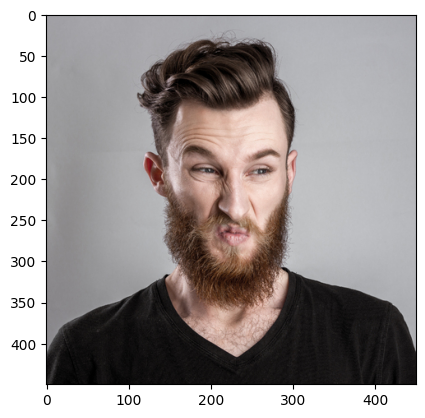

In [3]:
import cv2

img = cv2.imread(filename)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

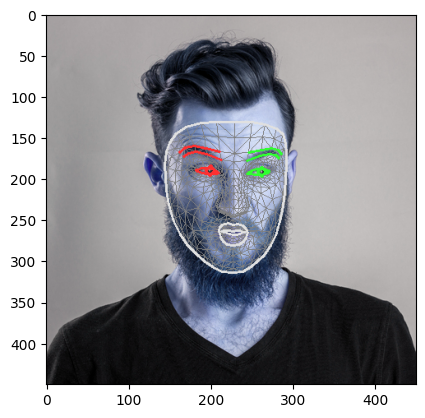

In [5]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

image = mp.Image.create_from_file(filename)
detection_result = detector.detect(image)
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))

In [20]:
print(detection_result.face_landmarks[0][400])

NormalizedLandmark(x=0.5541558861732483, y=0.6842954158782959, z=0.06567545235157013, visibility=0.0, presence=0.0)


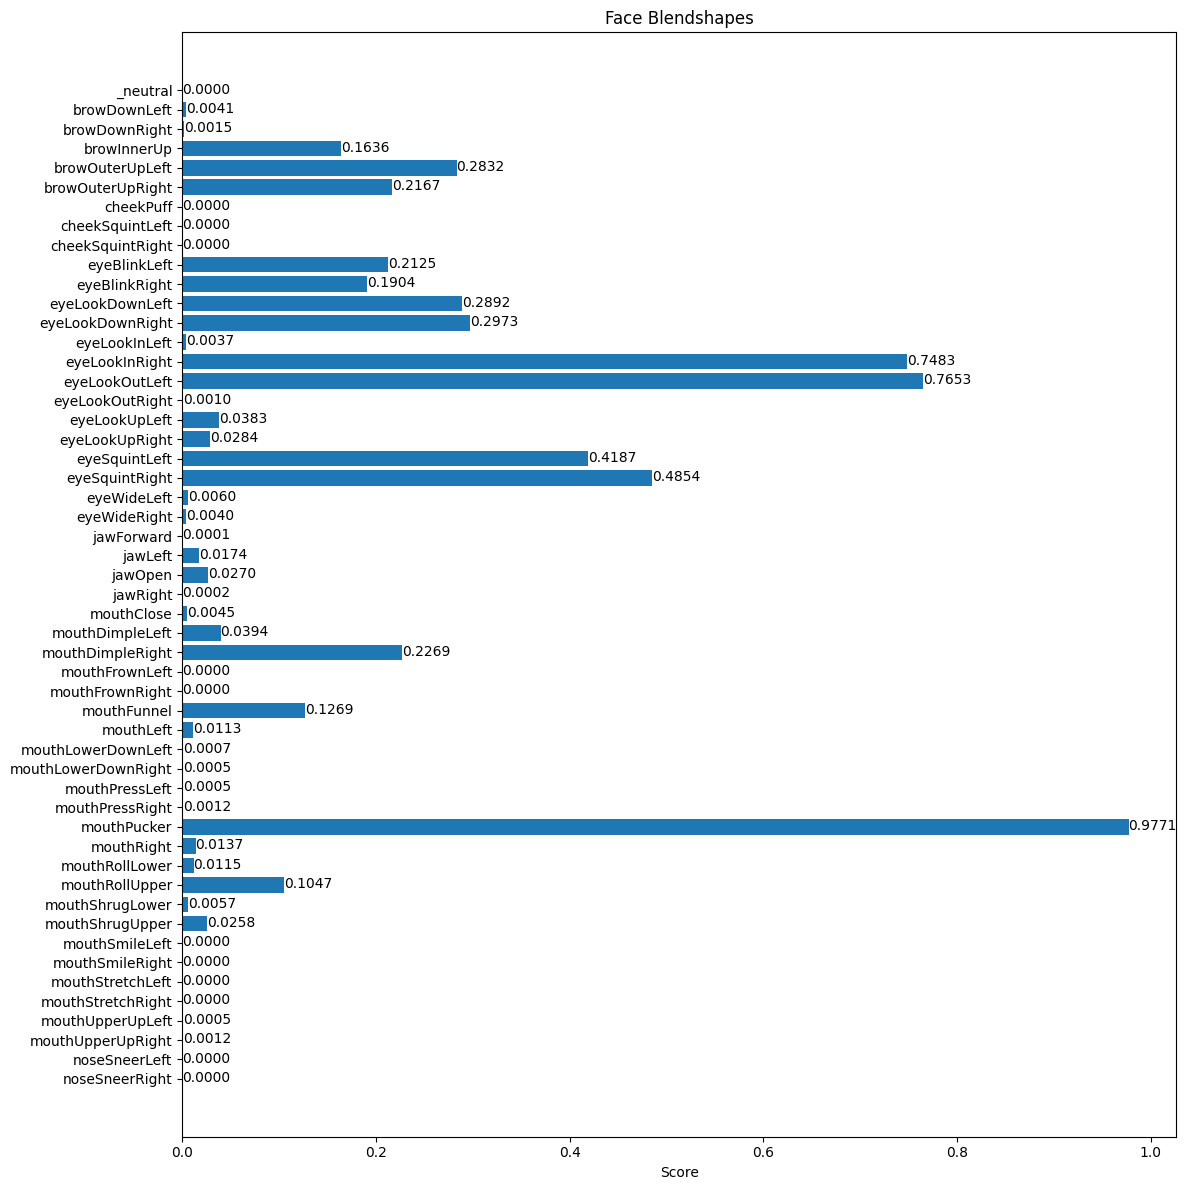

In [5]:
plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])

In [6]:
for blenshape_cat_id in range(len(detection_result.face_blendshapes[0])):
    print(blenshape_cat_id, detection_result.face_blendshapes[0][blenshape_cat_id].category_name, detection_result.face_blendshapes[0][blenshape_cat_id].score)

0 _neutral 2.3179894981240068e-07
1 browDownLeft 0.0040563736110925674
2 browDownRight 0.0015011316863819957
3 browInnerUp 0.16358833014965057
4 browOuterUpLeft 0.2832139730453491
5 browOuterUpRight 0.21672606468200684
6 cheekPuff 8.113412150123622e-06
7 cheekSquintLeft 1.9288836483610794e-07
8 cheekSquintRight 7.995708273256241e-08
9 eyeBlinkLeft 0.2124994546175003
10 eyeBlinkRight 0.19042737782001495
11 eyeLookDownLeft 0.289213091135025
12 eyeLookDownRight 0.29731589555740356
13 eyeLookInLeft 0.003668780904263258
14 eyeLookInRight 0.7483394145965576
15 eyeLookOutLeft 0.765277624130249
16 eyeLookOutRight 0.001006371690891683
17 eyeLookUpLeft 0.03825696185231209
18 eyeLookUpRight 0.028359634801745415
19 eyeSquintLeft 0.4187034070491791
20 eyeSquintRight 0.4854048788547516
21 eyeWideLeft 0.005996571853756905
22 eyeWideRight 0.004030907992273569
23 jawForward 5.3512907470576465e-05
24 jawLeft 0.017385730519890785
25 jawOpen 0.026963530108332634
26 jawRight 0.00015529479424003512
27 mouth